In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
housing=pd.read_csv("Housing.csv")
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [2]:
from sklearn.preprocessing import LabelEncoder
label_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
label_encoder = LabelEncoder()

for col in label_columns:
    housing[col] = label_encoder.fit_transform(housing[col])
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [3]:
X = housing.drop("price", axis=1)  
y = housing["price"]  
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_scale = scalar.fit_transform(X)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size= 0.3 , random_state=42)

x_train

array([[ 0.92680834,  0.04727831, -0.57018671, ...,  1.51769249,
         1.80494113,  1.22296203],
       [-0.72252469, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -0.09166185],
       [-0.40151356, -1.30886273, -0.57018671, ...,  1.51769249,
        -0.55403469, -0.09166185],
       ...,
       [-0.30004453,  0.04727831,  1.42181174, ...,  0.35597563,
        -0.55403469, -1.40628573],
       [-0.51220705, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [ 0.16117836,  0.04727831,  1.42181174, ...,  0.35597563,
        -0.55403469, -0.09166185]])

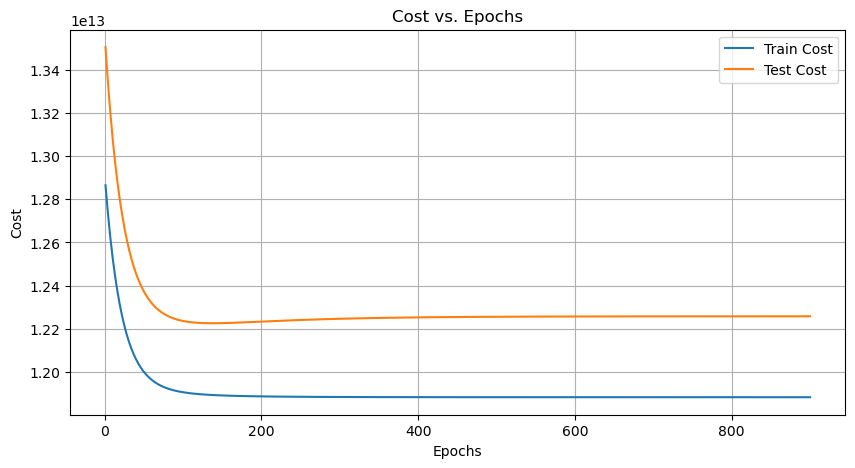

In [4]:


def load_data(filename):
    data = pd.read_csv(filename)
    X = data.drop('price', axis=1).values
    y = data['price'].values
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def h_function(X, theta):
#     print(X)
#     print(theta)
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    h = h_function(X, theta)
    return np.sum((h - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    cost_history_train = []
    cost_history_test = []
    
    for epoch in range(num_epochs):
        h = h_function(X, theta)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        
        cost_train = cost_function(X, y, theta)
        cost_history_train.append(cost_train)
        
        # Calculate cost on the test set
        cost_test = cost_function(x_test, y_test, theta)
        cost_history_test.append(cost_test)
    
    return theta, cost_history_train, cost_history_test

def plot_data(cost_history_train, cost_history_test):
    epochs = range(1, len(cost_history_train) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, cost_history_train, label='Train Cost')
    plt.plot(epochs, cost_history_test, label='Test Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs. Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
#     filename = 'Housing.csv'
#     X, y = load_data(filename)
#     X_train, X_test, y_train, y_test = split_data(X, y)
    
    num_epochs = 900
    learning_rate = 0.01
    theta = np.zeros(x_train.shape[1])  
    
    theta, train_cost_history, test_cost_history = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)
    
    plot_data(train_cost_history, test_cost_history)